David Felipe Mora - Ciencias de la computación

# Tarea 4 - Notebook 2

# Requerimientos

In [90]:
import numpy as np    
import scipy.interpolate as inter
import matplotlib.pyplot as plt
np.set_printoptions(formatter={'float': '{: 0.4f}'.format})

# Problemas

# Problema 1
Considere la tabla, 

| Hora      | Temperatura |
| :---      |    :----:   |
|13    |   18     |
|14    |   18     |
|15    |   17     |
|16    |   16     |
|17    |   15     |
|18    |   14     |

Usando diferentes interpolaciones (ver arriba) estimar la temperatura a las 15:30 (15.5). Explique las diferencias de los resultados. Usando diferentes interpolaciones (ver arriba) estimar la temperatura a las 15:30. Explique las diferencias de los resultados. ¿Cuál  es la mejor respuesta?. Justifique. Puede graficar los resoutados de diferentes interpolaciones como en el ejemplo arriba. 

In [91]:
datos = np.array(
        [[13, 18],
         [14, 18],
         [15, 17], 
         [16, 16],
         [17, 15],
         [18, 14]])
x = datos[:, 0] 
y = datos[:, 1]

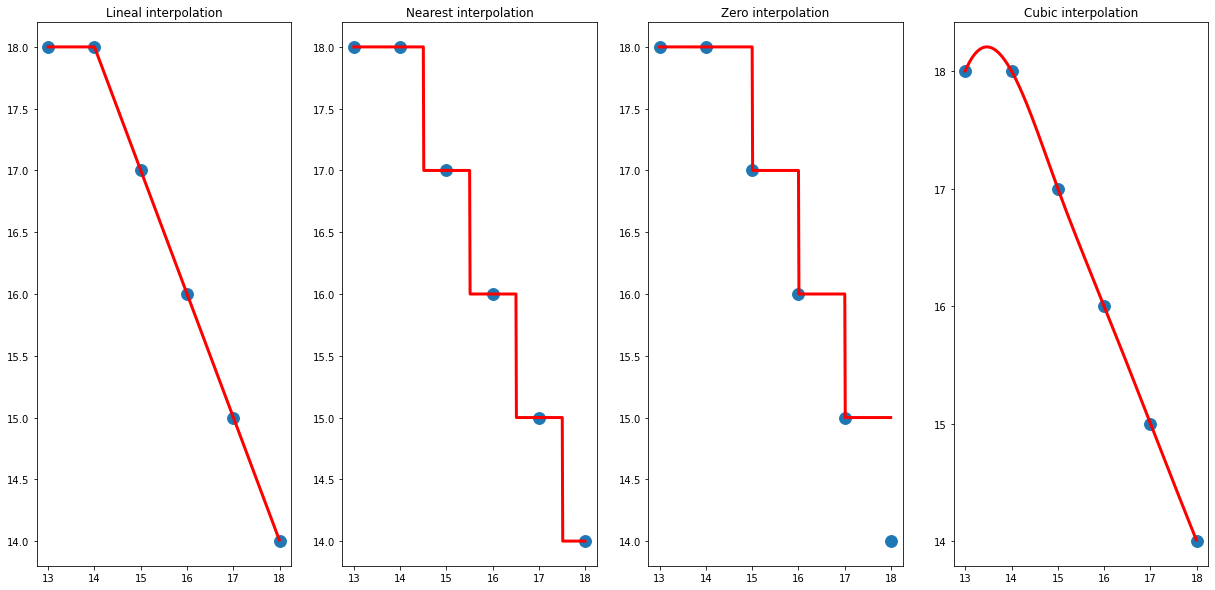

In [92]:
t = np.arange(13, 18, .01) 

fl = inter.interp1d(x, y, kind='linear') 
vl = fl(t)

fn = inter.interp1d(x, y, kind='nearest')
vn = fn(t)

fz = inter.interp1d(x, y, kind='zero')
vz = fz(t)

fc = inter.interp1d(x, y, kind='cubic')
vc = fc(t)

plt.figure(figsize=(21, 10))
for idx, (intr, name)  in enumerate(zip([vl, vn, vz, vc], ["Lineal", "Nearest", "Zero", "Cubic"])):
    plt.subplot(1, 4, idx + 1)
    plt.scatter(x, y, s=140, label="Temperatura")
    plt.plot(t, intr, linewidth=3, color="red", label="Lineal")
    plt.title(f"{name} interpolation")

Ahora calculamos la temperatura aproximada mediante cada una de las interpolaciones:

In [93]:
print("Temperatura a las 15:30 aproximada:")
print(f"Interpolación lineal: {fl(15.5)}")
print(f"Interpolación nearest: {fn(15.5)}")
print(f"Interpolación zeros: {fz(15.5)}")
print(f"Interpolación cubic: {fc(15.5)}")

Temperatura a las 15:30 aproximada:
Interpolación lineal: 16.5
Interpolación nearest: 17.0
Interpolación zeros: 17.0
Interpolación cubic: 16.487499999999997


- Las interpolaciones `zeros` y `nearest` son muy similares ya que ambas tienen ambas toman unicamente valores enteros, esto es debido a que `zeros` hace una interpolacion con splines de orden 0 y `nearest` redondea habia abajo. Estas no son buenas soluciones al problema ya no representan un cambio gradual entre temperaturas.

- La interpolación lineal es un poco mejor ya que reprensenta mejor el cambio gradual de la temperatura, sin embargo es muy "tensa" y representa cambios de temperatura que no son suaves en algunos puntos.

- La interpolación por splines de orden 3 es posiblemente la mejor de las 4 ya que es una curva mas suave y por lo tanto representa mejor los cambios de temperatura a traves del dia.

# Problema 2

**(Kincay y Chiney)** Se ha diseñando la letra de la figura y se quiere reproducr (con ayuda de los puntos de control marcados) y usando splines. Use la interpolación por splines y depligue esta figura usando interpolación por splines evaluada en 10 puntos, 100 puntos y 1000 puntos. En el ejemplo arriba el numero de puntos desplegados es la dimension del vectro s. 


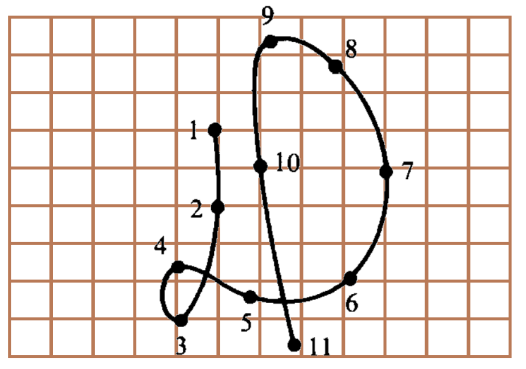

In [94]:
puntos = np.array(
            [[5, 5.9],
            [5, 4],
            [4.1, 1], 
            [4, 2.3], 
            [5.8, 1.6],
            [8.1, 2.1],
            [9, 4.9],
            [7.9, 7.7],
            [6.3, 8.3], 
            [6, 5],
            [6.9, 0.3]])

def plot_line(puntos, num_puntos):
    t = range(1, 12)
    s = np.linspace(1, 11, num_puntos)
    coorx, coory = puntos[:, 0], puntos[:, 1]


    icx = inter.interp1d(t, coorx, kind='linear')
    curvex = icx(s)

    icy = inter.interp1d(t, coory, kind='cubic')
    curvey = icy(s)


    plt.plot(curvex, curvey, linewidth=10, color='blue', alpha=0.8)
    plt.scatter(coorx, coory, s=400, color='red')
    plt.axis('equal')
    plt.grid(color='gray', linestyle='--', linewidth=2)
    plt.title(f"Evaluación en {num_puntos} puntos")

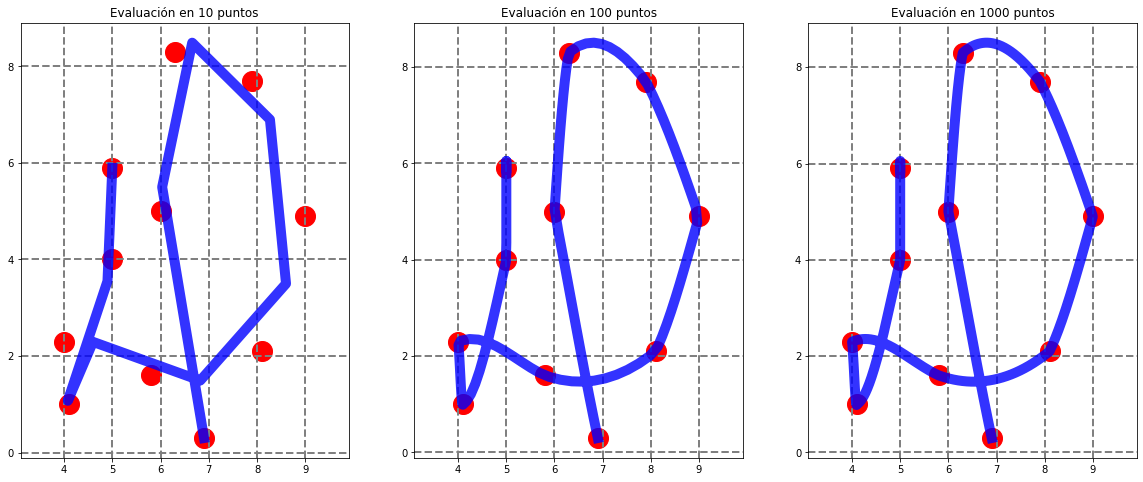

In [95]:
plt.figure(figsize=(20, 8))
for idx, num_puntos in enumerate([10, 100, 1000]):
    plt.subplot(1, 3, idx + 1)
    plot_line(puntos, num_puntos)